<a href="https://colab.research.google.com/github/cseaboys/dl/blob/main/e1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models,Input
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Check the shape of our data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [9]:
# Create the CNN model
model = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3472 - loss: 1.7702 - val_accuracy: 0.5474 - val_loss: 1.2576
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5627 - loss: 1.2240 - val_accuracy: 0.5947 - val_loss: 1.1146
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6351 - loss: 1.0430 - val_accuracy: 0.6263 - val_loss: 1.0462
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6730 - loss: 0.9336 - val_accuracy: 0.6767 - val_loss: 0.9362
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6959 - loss: 0.8725 - val_accuracy: 0.6836 - val_loss: 0.9010
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7196 - loss: 0.8065 - val_accuracy: 0.6661 - val_loss: 0.9535
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7358 - loss: 0.7503 - val_accuracy: 0.6830 - val_loss: 0.9019
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7577 - loss: 0.6967 - val_accuracy: 0.

In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.7224 - loss: 0.8848

Test accuracy: 0.7224


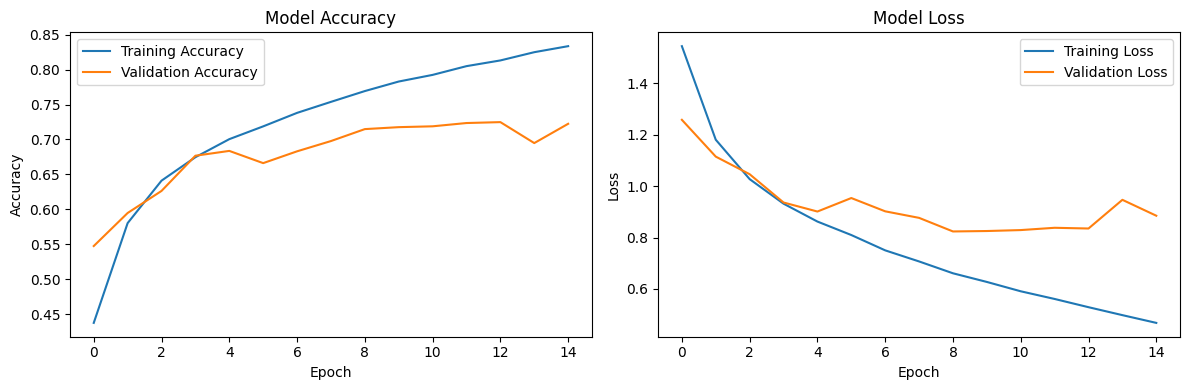

In [11]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
First 5 Predictions:



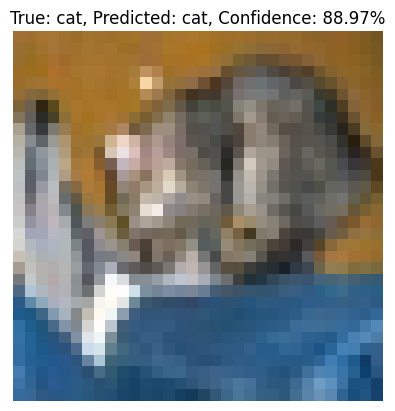

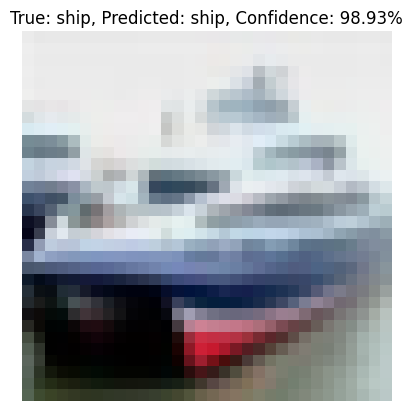

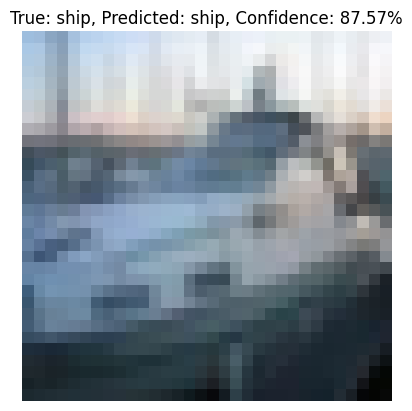

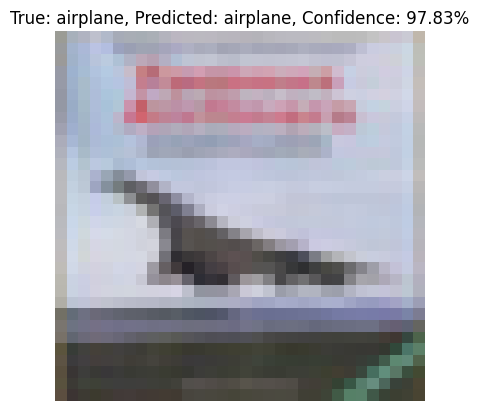

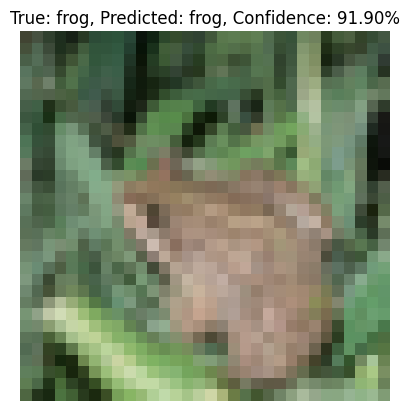

In [12]:
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

print("First 5 Predictions:\n")
for i in range(5):
    plt.imshow(x_test[i])
    confidence = predictions[i][predicted_classes[i]] * 100
    plt.title(f"True: {class_names[true_classes[i]]}, Predicted: {class_names[predicted_classes[i]]}, Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()